# Data Understanding

Notebook ini berisi analisis pemahaman data untuk dataset Iris klasik yang akan digunakan untuk klasifikasi spesies bunga iris.

## 1. Import Library dan Load Dataset

In [12]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


In [13]:
# Load dataset Iris dari sklearn
iris_data = load_iris()

# Buat DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Iris berhasil dimuat")
print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
df.head()

Dataset Iris berhasil dimuat
Ukuran dataset: 150 baris, 6 kolom


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 2. Informasi Dasar Dataset

In [14]:
# Informasi umum dataset
print("INFORMASI DATASET IRIS")
print(f"Jumlah sampel: {len(df)}")
print(f"Jumlah fitur: {len(df.columns)-2} (tanpa target)")
print(f"Jumlah kelas: {df['species'].nunique()}")
print(f"Nama kelas: {list(df['species_name'].unique())}")
print("\nINFO DATAFRAME")
df.info()

INFORMASI DATASET IRIS
Jumlah sampel: 150
Jumlah fitur: 4 (tanpa target)
Jumlah kelas: 3
Nama kelas: ['setosa', 'versicolor', 'virginica']

INFO DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [15]:
# Deskripsi variabel
print("DESKRIPSI VARIABEL")
print("\nFitur-fitur dalam dataset:")
feature_descriptions = {
    'sepal length (cm)': 'Panjang sepal (kelopak bunga) dalam cm',
    'sepal width (cm)': 'Lebar sepal (kelopak bunga) dalam cm', 
    'petal length (cm)': 'Panjang petal (mahkota bunga) dalam cm',
    'petal width (cm)': 'Lebar petal (mahkota bunga) dalam cm'
}

for feature, description in feature_descriptions.items():
    print(f"• {feature}: {description}")
    
print("\nTarget variable:")
print("• species: Spesies bunga iris (setosa, versicolor, virginica)")

DESKRIPSI VARIABEL

Fitur-fitur dalam dataset:
• sepal length (cm): Panjang sepal (kelopak bunga) dalam cm
• sepal width (cm): Lebar sepal (kelopak bunga) dalam cm
• petal length (cm): Panjang petal (mahkota bunga) dalam cm
• petal width (cm): Lebar petal (mahkota bunga) dalam cm

Target variable:
• species: Spesies bunga iris (setosa, versicolor, virginica)


## 3. Mengecek Tipe Data dan Jenis Variabel

In [16]:
# Cek tipe data setiap kolom
print("CEK TIPE DATA SETIAP KOLOM")
print("\nTipe data dalam dataset:")
print(df.dtypes)

CEK TIPE DATA SETIAP KOLOM

Tipe data dalam dataset:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
species_name          object
dtype: object


In [17]:
# Analisis jenis variabel berdasarkan klasifikasi
print("KLASIFIKASI JENIS VARIABEL")
print("\nTeori Jenis Variabel:")
print("• Quantitative (Numerik): Nilai angka, bisa dihitung")
print("• Qualitative (Kategorikal): Klasifikasi atau kategori")
print("• Discrete: Nilai terpisah (tanpa nilai antara)")
print("• Continuous: Nilai kontinu (bisa pecahan)")

print("\nANALISIS VARIABEL DATASET IRIS")

# Analisis setiap variabel
variable_analysis = {
    'sepal length (cm)': {
        'tipe_data': str(df['sepal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal length (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal length (cm)'].min():.1f} - {df['sepal length (cm)'].max():.1f} cm"
    },
    'sepal width (cm)': {
        'tipe_data': str(df['sepal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal width (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal width (cm)'].min():.1f} - {df['sepal width (cm)'].max():.1f} cm"
    },
    'petal length (cm)': {
        'tipe_data': str(df['petal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal length (cm)'].head(3).tolist(),
        'rentang': f"{df['petal length (cm)'].min():.1f} - {df['petal length (cm)'].max():.1f} cm"
    },
    'petal width (cm)': {
        'tipe_data': str(df['petal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal width (cm)'].head(3).tolist(),
        'rentang': f"{df['petal width (cm)'].min():.1f} - {df['petal width (cm)'].max():.1f} cm"
    },
    'species': {
        'tipe_data': str(df['species'].dtype),
        'jenis_variabel': 'Qualitative (Kategorikal)',
        'sub_kategori': 'Discrete (Nominal)',
        'deskripsi': 'Kategori terpisah, tidak ada urutan',
        'contoh_nilai': df['species'].unique().tolist(),
        'rentang': f"{df['species'].nunique()} kategori (0, 1, 2)"
    },
    'species_name': {
        'tipe_data': str(df['species_name'].dtype),
        'jenis_variabel': 'Qualitative (Kategorikal)',
        'sub_kategori': 'Discrete (Nominal)',
        'deskripsi': 'Kategori nama spesies, tidak ada urutan',
        'contoh_nilai': df['species_name'].unique().tolist(),
        'rentang': f"{df['species_name'].nunique()} kategori"
    }
}

# Tampilkan analisis setiap variabel
for i, (var_name, analysis) in enumerate(variable_analysis.items(), 1):
    print(f"\n{i}. VARIABEL: {var_name.upper()}")
    print(f"   • Tipe Data: {analysis['tipe_data']}")
    print(f"   • Jenis Variabel: {analysis['jenis_variabel']}")
    print(f"   • Sub-kategori: {analysis['sub_kategori']}")
    print(f"   • Deskripsi: {analysis['deskripsi']}")
    print(f"   • Contoh nilai: {analysis['contoh_nilai']}")
    print(f"   • Rentang: {analysis['rentang']}")

KLASIFIKASI JENIS VARIABEL

Teori Jenis Variabel:
• Quantitative (Numerik): Nilai angka, bisa dihitung
• Qualitative (Kategorikal): Klasifikasi atau kategori
• Discrete: Nilai terpisah (tanpa nilai antara)
• Continuous: Nilai kontinu (bisa pecahan)

ANALISIS VARIABEL DATASET IRIS

1. VARIABEL: SEPAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [5.1, 4.9, 4.7]
   • Rentang: 4.3 - 7.9 cm

2. VARIABEL: SEPAL WIDTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [3.5, 3.0, 3.2]
   • Rentang: 2.0 - 4.4 cm

3. VARIABEL: PETAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [1.4, 1.4, 1.3]
   • Rentang: 1.0 

## 4. Eksplorasi Data Awal

In [18]:
# Statistik deskriptif
print("STATISTIK DESKRIPTIF")
stats = df.describe()
print(stats.round(2))

STATISTIK DESKRIPTIF
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  species  
count            150.00   150.00  
mean               1.20     1.00  
std                0.76     0.82  
min                0.10     0.00  
25%                0.30     0.00  
50%                1.30     1.00  
75%                1.80     2.00  
max                2.50     2.00  


In [19]:
# Distribusi kelas
print("DISTRIBUSI KELAS")
class_counts = df['species_name'].value_counts()
print(class_counts)
print("\nPersentase:")
class_percentage = df['species_name'].value_counts(normalize=True) * 100
for species, percentage in class_percentage.items():
    print(f"• {species}: {percentage:.1f}%")

DISTRIBUSI KELAS
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Persentase:
• setosa: 33.3%
• versicolor: 33.3%
• virginica: 33.3%


In [20]:
# Cek missing values
print("CEK MISSING VALUES")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nDataset tidak memiliki missing values")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")

CEK MISSING VALUES
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Dataset tidak memiliki missing values


In [21]:
# Cek duplikasi data
print("CEK DUPLIKASI DATA")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates == 0:
    print("Tidak ada data duplikat")
else:
    print(f"Terdapat {duplicates} baris duplikat")

CEK DUPLIKASI DATA
Jumlah baris duplikat: 1
Terdapat 1 baris duplikat


## 5. Analisis Distribusi Data

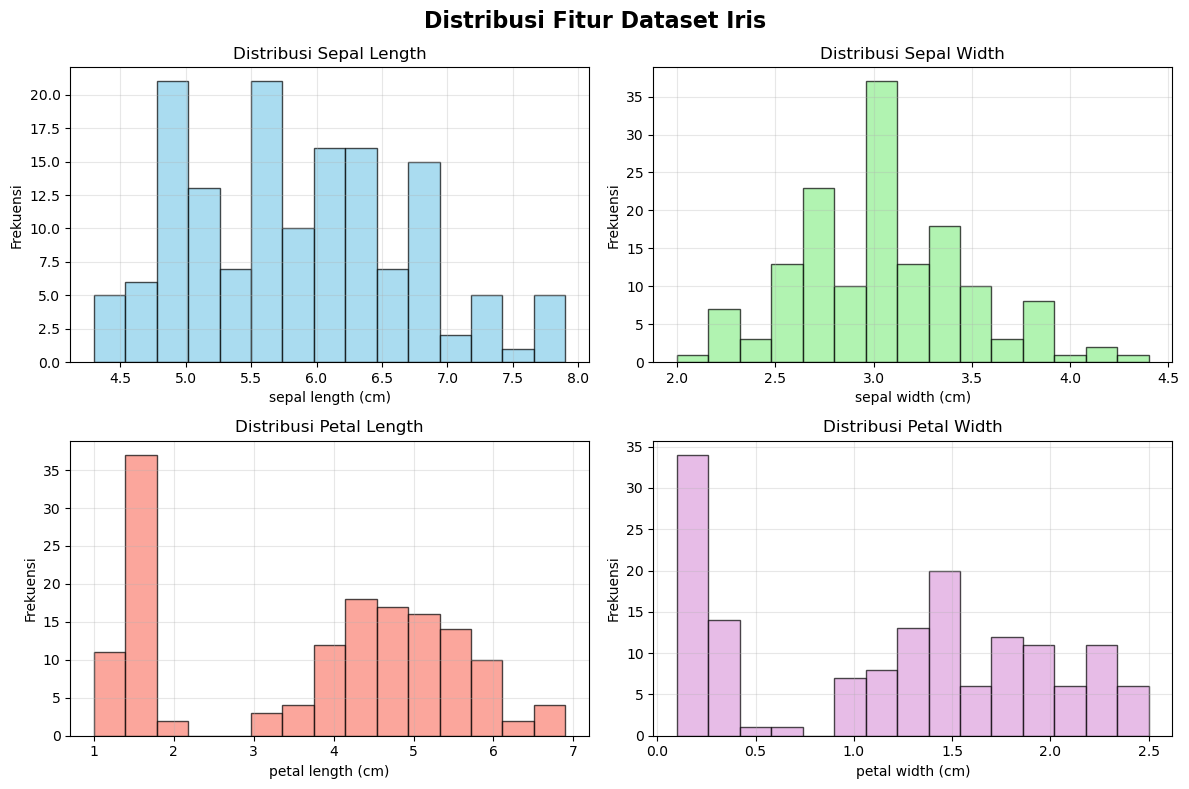

In [22]:
# Visualisasi distribusi fitur
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribusi Fitur Dataset Iris', fontsize=16, fontweight='bold')

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i, (feature, color) in enumerate(zip(features, colors)):
    row = i // 2
    col = i % 2
    
    axes[row, col].hist(df[feature], bins=15, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Distribusi {feature.split("(")[0].strip().title()}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frekuensi')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Kesimpulan

### Ringkasan Dataset Iris:

1. **Ukuran Dataset**: 150 sampel dengan 4 fitur
2. **Jenis Variabel**: Semua fitur adalah quantitative continuous
3. **Target**: 3 kelas spesies iris yang seimbang (50 sampel per kelas)
4. **Kualitas Data**: Tidak ada missing values, hanya 1 duplikat
5. **Distribusi**: Data terdistribusi dengan baik untuk setiap fitur

Dataset ini siap untuk digunakan dalam analisis machine learning selanjutnya.